- Create venv: `python3 -m venv .venv`
- Activate venv: `. .venv/bin/activate`
- Install requirements: `pip install -r requirements.txt`

In [1]:
import numpy as np
import skimage.io
import skimage.util
import skimage.morphology
import matplotlib.pyplot as plt
import scipy.ndimage

In [2]:
# frame2.png has darker fire things :(, which means needing to redo the color checks

im = skimage.io.imread("frame1.png")
print(im.shape, im.dtype)
im = skimage.util.img_as_float(im)
print(im.shape, im.dtype)

(1666, 2284, 3) uint8
(1666, 2284, 3) float64


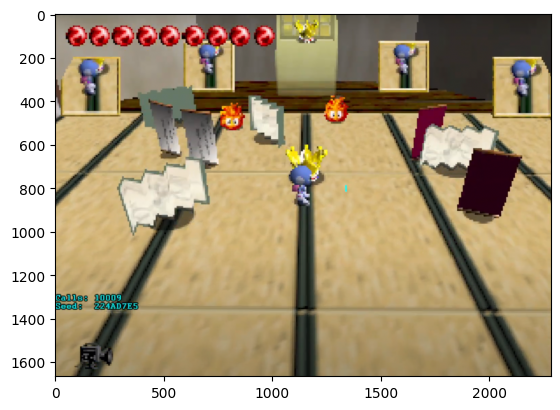

In [3]:
plt.imshow(im)

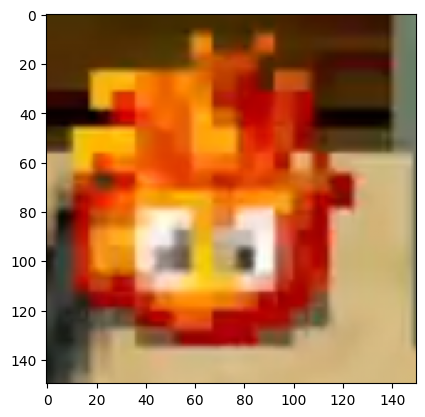

In [4]:
plt.imshow(im[400:550,750:900,:])

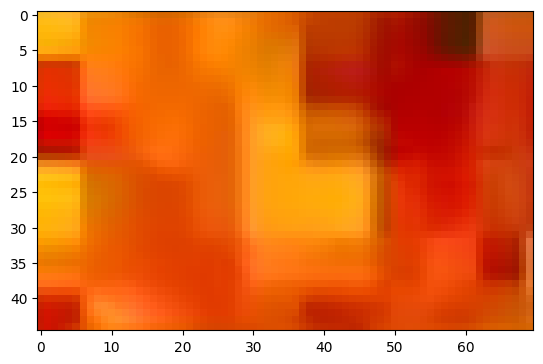

In [5]:
red_colors = im[400:550,750:900,:][25:70,30:100,:]
plt.imshow(red_colors)

(3150, 3)


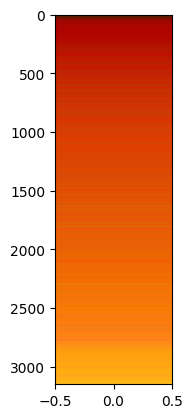

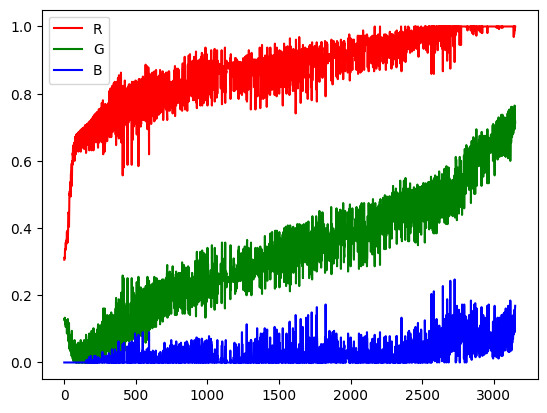

In [6]:
red_colors_raveled = np.reshape(
    red_colors,
    (red_colors.shape[0] * red_colors.shape[1], 3),
)
print(red_colors_raveled.shape)
red_colors_raveled = np.array(
    sorted(
        (red_colors_raveled[i, :] for i in range(red_colors_raveled.shape[0])),
        key=lambda rgb: sum(rgb),
    )
)
plt.imshow(
    np.reshape(red_colors_raveled, (red_colors_raveled.shape[0], 1, 3)),
    aspect=0.001,
)
plt.figure()
for ch in range(3):
    plt.plot(
        red_colors_raveled[:, ch],
        label="RGB"[ch],
        color=("red", "green", "blue")[ch],
    )
plt.legend()

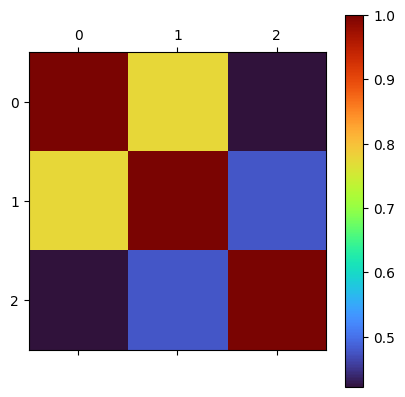

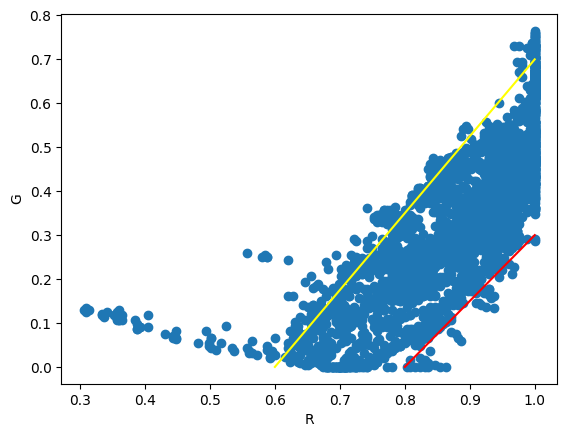

In [7]:
plt.matshow(np.corrcoef(red_colors_raveled.T), cmap="turbo")
plt.colorbar()
plt.figure()
plt.scatter(red_colors_raveled[:, 0], red_colors_raveled[:, 1])
plt.xlabel("R")
plt.ylabel("G")
plt.plot([0.8,1], [0,0.3], "red")
plt.plot([0.6,1], [0,0.7], "yellow")

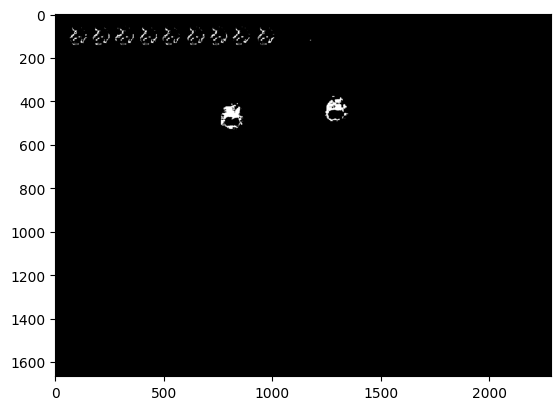

In [8]:
im_is_red = im[:, :, 0] > 0.7
im_is_not_blue = im[:, :, 2] < 0.2
im_is_not_too_green = im[:, :, 1] < (
    (im[:, :, 0] - 0.6) * 0.7 / (1 - 0.6)
)  # yellow line
im_is_enough_green = im[:, :, 1] > ((im[:, :, 0] - 0.8) * 0.3 / (1 - 0.8))  # red line

im_is_firething = im_is_red & im_is_not_blue & im_is_not_too_green & im_is_enough_green
plt.imshow(im_is_firething, cmap="gray")

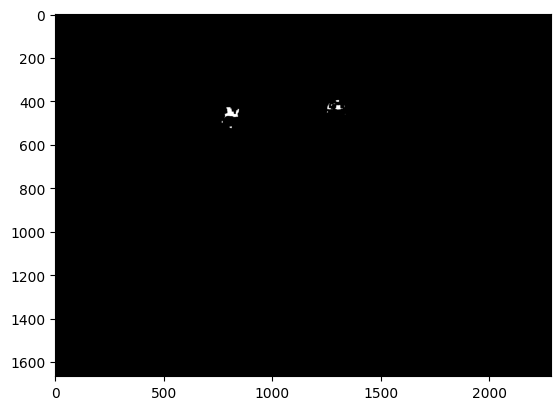

In [9]:
N = 9
im_is_firething_erode_noise = skimage.morphology.binary_erosion(
    im_is_firething, np.ones((N, N))
)
plt.imshow(im_is_firething_erode_noise, cmap="gray")

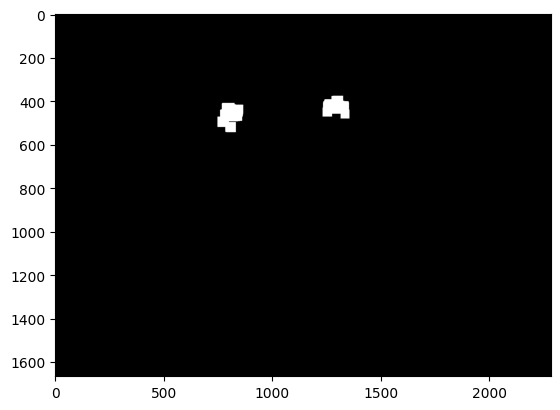

In [10]:
N = 40
im_is_firething_dilate_join_islands = skimage.morphology.binary_dilation(
    im_is_firething_erode_noise, np.ones((N, N))
)
plt.imshow(im_is_firething_dilate_join_islands, cmap="gray")

num_features=2
[428.77965934823277, 1294.5860982573595]
[470.6740498363957, 806.3745280644349]
[(1294.5860982573595, 428.77965934823277), (806.3745280644349, 470.6740498363957)]


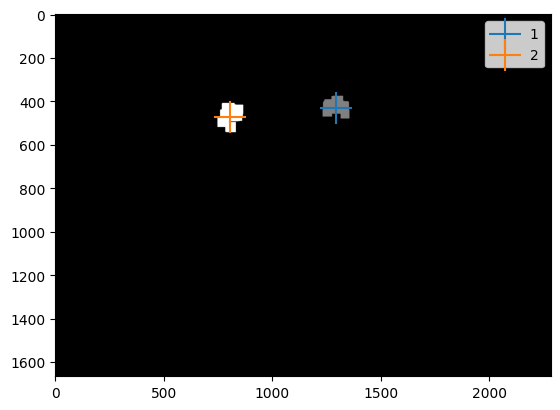

In [11]:
# https://stackoverflow.com/questions/46737409/finding-connected-components-in-a-pixel-array

label, num_features = scipy.ndimage.label(im_is_firething_dilate_join_islands)
print(f"{num_features=}")
plt.imshow(label, cmap="gray")

coords = []

for feature_i in range(num_features):
    feature_all_coords = np.nonzero(label == (1 + feature_i))
    feature_mean_coords = [np.mean(feature_all_coords[i]) for i in range(2)]
    print(feature_mean_coords)
    feature_mean_coords_y, feature_mean_coords_x = feature_mean_coords
    coords.append((feature_mean_coords_x, feature_mean_coords_y))
    plt.scatter(
        feature_mean_coords_x,
        feature_mean_coords_y,
        label=f"{1+feature_i}",
        marker="+",
        s=500,
    )
plt.legend()
print(coords)

(1294.5860982573595, 428.77965934823277)
(806.3745280644349, 470.6740498363957)


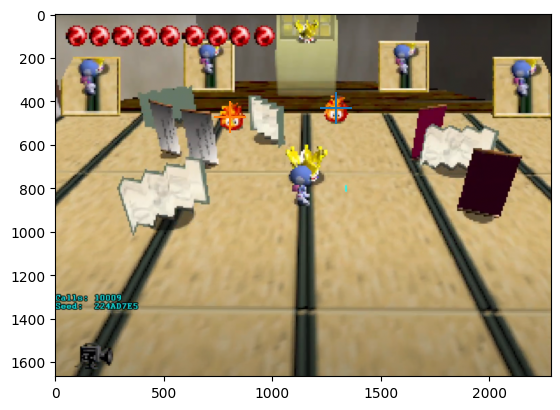

In [12]:
plt.imshow(im)
for coord in coords:
    print(coord)
    plt.scatter(*coord, label=f"{1+feature_i}", marker="+", s=500)